In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:

#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Eclipse Dataset ( Whole, Sim & Dissim)

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe (Eclipse)
df_whole=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Firefox/final_firefox_data_15thmarch.csv')
df_whole

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Changed,Description,Duplicate_Bug_Ids
0,1399936,defect,Shield unenrolls users in active preference ex...,Firefox,Normandy Client,VERIFIED,FIXED,2018-01-27 11:10:40,the activity stream team is conducting a study...,NaN
1,1387208,defect,browser_as_load_location.js is permafailing on...,Firefox,New Tab Page,RESOLVED,FIXED,2019-06-28 14:29:46,filed by rvandermeulen at mozilla com j...,NaN
2,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
3,1383741,defect,Perma failure when 56 merge to beta in browser...,Firefox,Preferences,RESOLVED,FIXED,2017-07-27 02:02:17,found via uplift simulations perma failure w...,NaN
4,1388753,defect,Bookmarks and history pages in Library sub men...,Firefox,Toolbars and Customization,VERIFIED,FIXED,2017-09-22 10:09:03,user agent mozilla gecko firefox ...,NaN
...,...,...,...,...,...,...,...,...,...,...
43154,1693437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,filed by cbrindusan at mozilla com pa...,NaN
43155,1723924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,created attachment pdf hover zoom webm af...,NaN
43156,1706232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,created attachment send tab to device page a...,NaN
43157,1746000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,created attachment border of active tab wit...,NaN


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Firefox/firefox_textually_similar_duplicates_15thmarch.csv')
df_sim

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
0,1337204,defect,Mozilla Firefox 51.0.1 uses a lot of memory wi...,Firefox,Extension Compatibility,RESOLVED,DUPLICATE,0.064660,2017-07-05 11:48:47,user agent mozilla gecko firefox ...,1346556.0
1,1340122,defect,List box (or) Drop-down box background color n...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.066823,2017-02-16 04:31:51,user agent mozilla gecko firefox ...,910022.0
2,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,DUPLICATE,0.077518,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
3,1375888,defect,Ctrl+F Should focus the search field in prefer...,Firefox,Preferences,RESOLVED,DUPLICATE,0.061886,2017-08-24 03:03:52,i would expect that hitting ctrl f on the page...,1382566.0
4,1410433,defect,"""Open a new tab"" button overlaps with pin tabs",Firefox,Theme,RESOLVED,DUPLICATE,0.069299,2018-03-08 09:31:28,created attachment webm mozilla g...,1404469.0
...,...,...,...,...,...,...,...,...,...,...,...
3919,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,DUPLICATE,0.084113,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0
3920,1732606,enhancement,Send tab button disappeared from URL bar,Firefox,Tabbed Browser,RESOLVED,DUPLICATE,0.075133,2021-11-08 12:04:32,user agent mozilla gecko firefox ...,1706232.0
3921,1733546,defect,[win] No focus is displayed when using keyboar...,Firefox,Downloads Panel,RESOLVED,DUPLICATE,0.079284,2021-10-13 09:06:43,created attachment gif affected versions...,1686694.0
3922,1724390,defect,Option to add the already added click search e...,Firefox,Search,RESOLVED,DUPLICATE,0.077693,2021-08-06 04:40:51,created attachment searchengine png affec...,1457069.0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_dissim=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Dataset-15th March/Firefox/firefox_textually_dissimilar_duplicates_15thmarch.csv')
df_dissim

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
0,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.052101,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
1,1396728,defect,Windows 7 professional 64bit running Fx 51.0.1...,Firefox,Migration,RESOLVED,DUPLICATE,0.054861,2017-09-19 16:35:17,user agent mozilla gecko firefox ...,1352458.0
2,1368321,defect,"Firefox version 53.0.3 appears high memory, hi...",Firefox,Untriaged,RESOLVED,DUPLICATE,0.059954,2017-07-05 11:45:21,user agent mozilla gecko firefox ...,1346556.0
3,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,DUPLICATE,0.040182,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
4,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,DUPLICATE,0.043832,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
...,...,...,...,...,...,...,...,...,...,...,...
3918,1734045,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,DUPLICATE,0.039937,2021-10-11 02:40:19,filed by ctuns at mozilla com parsed ...,1733524.0
3919,1742873,defect,Intermittent browser_connection_dnsoverhttps.j...,Firefox,Preferences,RESOLVED,DUPLICATE,0.042591,2021-11-28 22:29:01,filed by imoraru at mozilla com parse...,1741554.0
3920,1747252,defect,[macOS] Tab border is black with certain custo...,Firefox,Theme,RESOLVED,DUPLICATE,0.057439,2022-01-25 12:01:42,created attachment before after tab affect...,1746000.0
3921,1717820,defect,[XFA] A string is displayed as double-underlin...,Firefox,PDF Viewer,RESOLVED,DUPLICATE,0.051704,2021-07-08 05:45:39,created attachment pdf note ...,1716833.0


## Statistics of dataset (all three for eclipse)

In [ ]:
# Statistics of description for the whole dataset
FEATURES_whole = ['Description']
print('Description of length of the feature columns')
df_whole[FEATURES_whole].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,43159.000000
mean,1014.711879
std,2621.188875
min,2.000000
25%,249.000000
50%,444.000000
75%,770.000000
max,57288.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_sim = ['Description']
print('Description of length of the feature columns')
df_sim[FEATURES_sim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,3924.000000
mean,664.362130
std,486.336919
min,45.000000
25%,406.000000
50%,561.000000
75%,783.000000
max,13467.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_dissim = ['Description']
print('Description of length of the feature columns')
df_dissim[FEATURES_dissim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,3923.000000
mean,1178.261535
std,3056.554262
min,6.000000
25%,228.000000
50%,379.000000
75%,662.000000
max,41680.000000


## Skewness & kurt of textually sim & dissim

Skewness:
0.85
kurt:
0.29
Mean:
0.08
Median:
0.07
Standard Deviation:
0.01


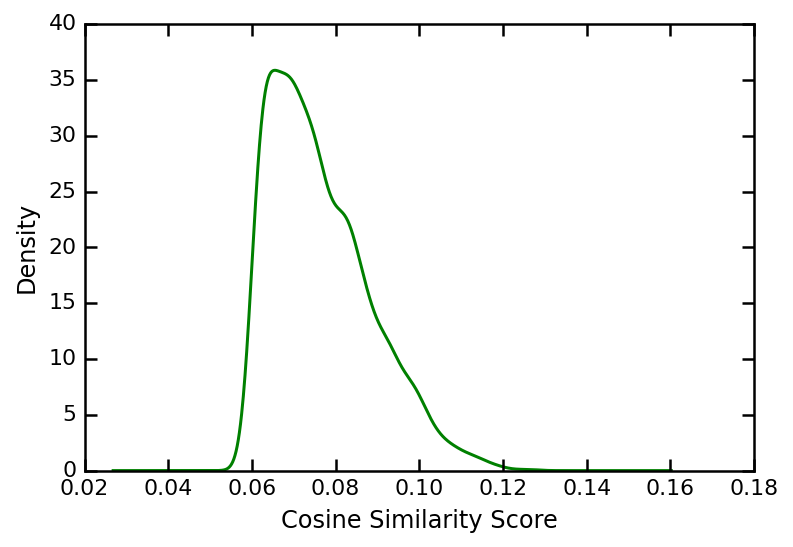

In [ ]:
# Textually similar dataset
import pandas as pds

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];

skewness = df_sim_cos.skew();
kurt = df_sim_cos.kurt();
mean = df_sim_cos.mean()
median = df_sim_cos.median()
std = df_sim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
# Positive kurtosis indicates a relatively peaked distribution.


plt.figure()
df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

Skewness:
-0.85
kurt:
0.11
Mean:
0.04
Median:
0.05
Standard Deviation:
0.01


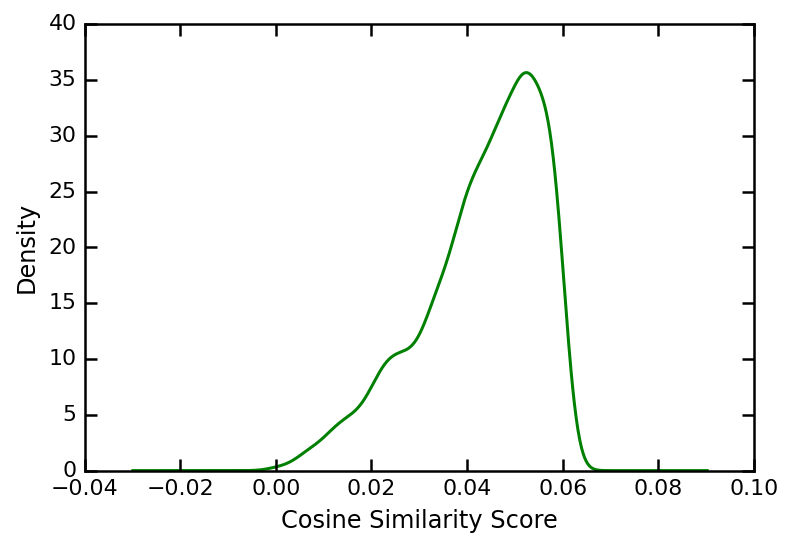

In [ ]:
# Textually dissimilar dataset
import pandas as pds

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];

skewness = df_dissim_cos.skew();
kurt = df_dissim_cos.kurt();
mean = df_dissim_cos.mean()
median = df_dissim_cos.median()
std = df_dissim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# Negative kurtosis indicates a relatively flat distribution.
plt.figure()
df_dissim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

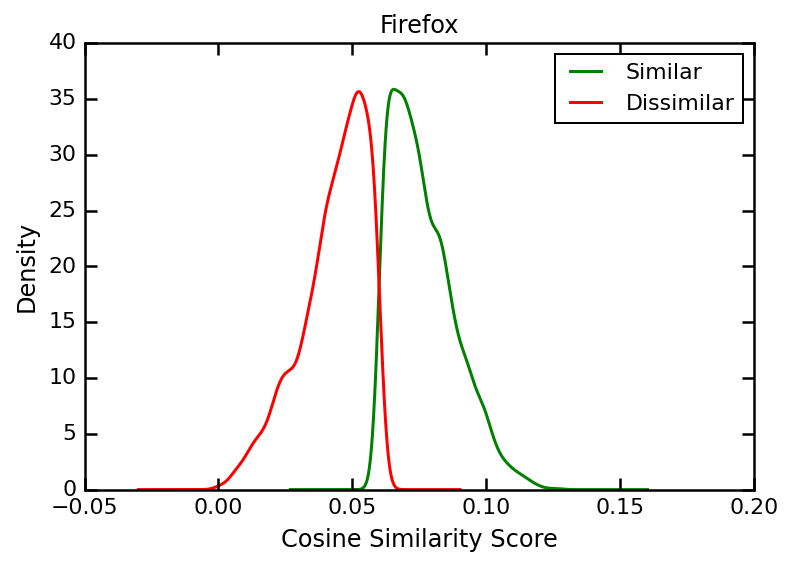

<Figure size 432x288 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
# create data
fig, ax = plt.subplots(2)

# plot lines
ax = plt.axes()
x1= df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y1= df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Firefox')

# plt.plot(x1)
# plt.plot(y1)


plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()
plt.savefig('Eclipse dist.png')

## plotting the cosine similarity score difference


In [ ]:
#fig1 = plt.figure()
#fig1.savefig('my_figure1.png')

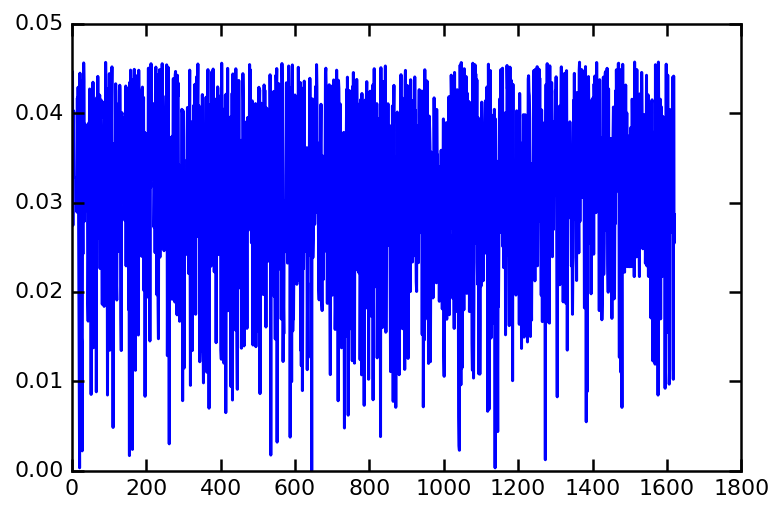

In [ ]:
df_dissim["Average_Cos_Similarity_Score"].plot()

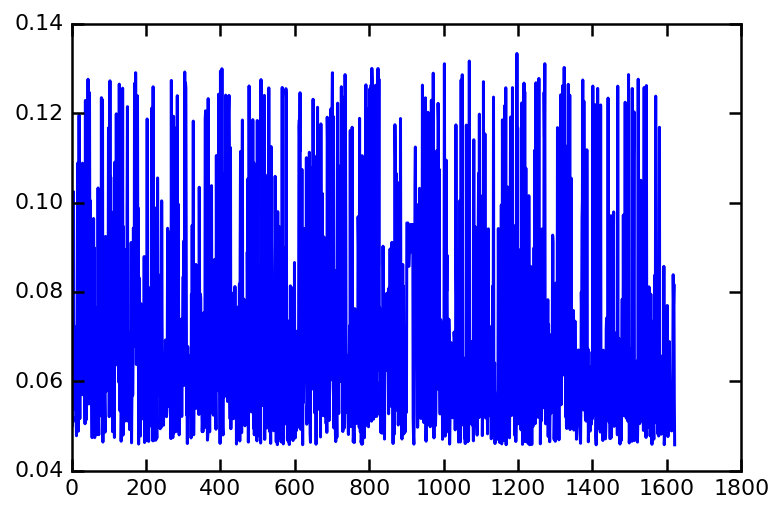

In [ ]:
df_sim["Average_Cos_Similarity_Score"].plot()

## Sorting by cosine value for sim & dis

In [ ]:
# Textually similar
df_sim_sort = df_sim.copy()
df_sim_sort

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
0,1337204,defect,Mozilla Firefox 51.0.1 uses a lot of memory wi...,Firefox,Extension Compatibility,RESOLVED,DUPLICATE,0.064660,2017-07-05 11:48:47,user agent mozilla gecko firefox ...,1346556.0
1,1340122,defect,List box (or) Drop-down box background color n...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.066823,2017-02-16 04:31:51,user agent mozilla gecko firefox ...,910022.0
2,1418073,defect,Drag & Drop for images to desktop strips file ...,Firefox,File Handling,RESOLVED,DUPLICATE,0.077518,2017-12-07 00:38:37,user agent mozilla gecko firefox ...,1389836.0
3,1375888,defect,Ctrl+F Should focus the search field in prefer...,Firefox,Preferences,RESOLVED,DUPLICATE,0.061886,2017-08-24 03:03:52,i would expect that hitting ctrl f on the page...,1382566.0
4,1410433,defect,"""Open a new tab"" button overlaps with pin tabs",Firefox,Theme,RESOLVED,DUPLICATE,0.069299,2018-03-08 09:31:28,created attachment webm mozilla g...,1404469.0
...,...,...,...,...,...,...,...,...,...,...,...
3919,1723008,defect,When opening a file off disk in the PDF Viewer...,Firefox,PDF Viewer,RESOLVED,DUPLICATE,0.084113,2021-08-12 00:12:55,created attachment a blank pdf just for tes...,1723924.0
3920,1732606,enhancement,Send tab button disappeared from URL bar,Firefox,Tabbed Browser,RESOLVED,DUPLICATE,0.075133,2021-11-08 12:04:32,user agent mozilla gecko firefox ...,1706232.0
3921,1733546,defect,[win] No focus is displayed when using keyboar...,Firefox,Downloads Panel,RESOLVED,DUPLICATE,0.079284,2021-10-13 09:06:43,created attachment gif affected versions...,1686694.0
3922,1724390,defect,Option to add the already added click search e...,Firefox,Search,RESOLVED,DUPLICATE,0.077693,2021-08-06 04:40:51,created attachment searchengine png affec...,1457069.0


In [ ]:
#highest textual similarity in textual similar dataset
df_sim_sort= df_sim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending=False, inplace=False, kind='quicksort')
df_sim_sort.reset_index(drop=True, inplace=True)
df_sim_sort

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
0,1454267,defect,Left tab should be selected after closing a ta...,Firefox,Tabbed Browser,RESOLVED,DUPLICATE,0.126869,2018-04-19 03:08:10,user agent mozilla gecko firefox ...,344508.0
1,1490053,defect,New Tab Focus not in Location Bar anymore,Firefox,Address Bar,RESOLVED,DUPLICATE,0.125670,2018-09-12 01:32:14,user agent mozilla gecko firefox ...,1485307.0
2,1370205,defect,Bug 1355764 causes graphics glitches in tab bar,Firefox,Theme,RESOLVED,DUPLICATE,0.122570,2017-06-05 08:02:35,created attachment screenshot png since the...,1369949.0
3,1532270,defect,Restarting to update Firefox should NEVER lose...,Firefox,Session Restore,RESOLVED,DUPLICATE,0.120108,2019-03-29 07:29:57,user agent mozilla gecko firefox ...,1330638.0
4,1606268,defect,menu bar items empty/invisible when opening PD...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.119711,2019-12-29 22:58:27,created attachment screenshot at ...,1603956.0
...,...,...,...,...,...,...,...,...,...,...,...
3919,1581745,defect,[Protection Panel][macOS] Radio button has mi...,Firefox,Site Identity,RESOLVED,DUPLICATE,0.060187,2019-09-23 01:43:41,affected versions nightly beta ...,1578052.0
3920,1719411,defect,tab not rendering,Firefox,Untriaged,RESOLVED,DUPLICATE,0.060186,2021-07-07 06:27:27,user agent mozilla gecko firefox ...,1719328.0
3921,1711620,enhancement,Allow synchronization of the site permissions ...,Firefox,Sync,RESOLVED,DUPLICATE,0.060184,2021-05-18 16:24:05,created attachment png user agent mozill...,470699.0
3922,1587251,defect,It doesn't be applied the last modification da...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.060181,2019-10-14 01:42:25,created attachment jpg user agent mozill...,1570972.0


In [ ]:
df_sim_sort= df_sim_sort[:385]
df_sim_sort= df_sim_sort.sample(frac=1).reset_index(drop=True)
df_sim_sort['Average_Cos_Similarity_Score'].values.tolist()

[0.0976756135859571,
 0.0957772483549976,
 0.1014718929902759,
 0.1086854072534066,
 0.0991869591242677,
 0.0963650138128864,
 0.0959751268552946,
 0.1015584975071761,
 0.0958785100116265,
 0.1077019785578839,
 0.0976748349331595,
 0.1111029033871069,
 0.107585075866657,
 0.1040558012305854,
 0.0981353321250477,
 0.0956456499686936,
 0.1051595568773167,
 0.0963479226869824,
 0.09848887836622,
 0.0962999897241643,
 0.1060206772892929,
 0.1080044148258938,
 0.1010338568498299,
 0.1085392811575401,
 0.0973123146862814,
 0.1009013648765691,
 0.1040008327016224,
 0.0941323386963444,
 0.1008569846525458,
 0.0942913604886459,
 0.1098208072680024,
 0.098977929313294,
 0.0959946147376741,
 0.0954236779165528,
 0.1178383604471472,
 0.1256704200287116,
 0.0967258151034163,
 0.0994501041177694,
 0.0990192550654171,
 0.1013227099694802,
 0.096913659811335,
 0.1080746959933135,
 0.1001657758507246,
 0.1172857203590065,
 0.1129842915236537,
 0.1038951561555089,
 0.0946777241872233,
 0.100961101296750

In [ ]:
# Textually dissimilar
df_dissim_sort = df_dissim.copy()
df_dissim_sort

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
0,1368432,defect,web.skype.com is inaccessible: SEC_ERROR_OCSP_...,Firefox,Untriaged,RESOLVED,DUPLICATE,0.052101,2017-05-29 04:49:00,user agent mozilla gecko firefox ...,1368433.0
1,1396728,defect,Windows 7 professional 64bit running Fx 51.0.1...,Firefox,Migration,RESOLVED,DUPLICATE,0.054861,2017-09-19 16:35:17,user agent mozilla gecko firefox ...,1352458.0
2,1368321,defect,"Firefox version 53.0.3 appears high memory, hi...",Firefox,Untriaged,RESOLVED,DUPLICATE,0.059954,2017-07-05 11:45:21,user agent mozilla gecko firefox ...,1346556.0
3,1357039,enhancement,Should add the Customize Firefox tour in the o...,Firefox,General,RESOLVED,DUPLICATE,0.040182,2017-06-14 22:34:09,should add the customize firefox tour in the o...,1357029.0
4,1359062,defect,Increase contrast of the Downloads Indicator o...,Firefox,Downloads Panel,RESOLVED,DUPLICATE,0.043832,2017-06-04 23:44:56,nightly on windows at the moment a...,1347543.0
...,...,...,...,...,...,...,...,...,...,...,...
3918,1734045,defect,Intermittent browser/base/content/test/general...,Firefox,General,RESOLVED,DUPLICATE,0.039937,2021-10-11 02:40:19,filed by ctuns at mozilla com parsed ...,1733524.0
3919,1742873,defect,Intermittent browser_connection_dnsoverhttps.j...,Firefox,Preferences,RESOLVED,DUPLICATE,0.042591,2021-11-28 22:29:01,filed by imoraru at mozilla com parse...,1741554.0
3920,1747252,defect,[macOS] Tab border is black with certain custo...,Firefox,Theme,RESOLVED,DUPLICATE,0.057439,2022-01-25 12:01:42,created attachment before after tab affect...,1746000.0
3921,1717820,defect,[XFA] A string is displayed as double-underlin...,Firefox,PDF Viewer,RESOLVED,DUPLICATE,0.051704,2021-07-08 05:45:39,created attachment pdf note ...,1716833.0


In [ ]:
# Lowest textual similarity in textual dissimilarity dataset
df_dissim_sort= df_dissim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending= True, inplace=False, kind='quicksort')
df_dissim_sort= df_dissim_sort[:385]
df_dissim_sort

,Bug ID,Type,Summary,Product,Component,Status,Resolution,Average_Cos_Similarity_Score,Changed,Description,Duplicate_Bug_Ids
3506,1733842,task,software error,Firefox,Address Bar,RESOLVED,DUPLICATE,0.000127,2021-10-03 08:39:30,eefr fhy,1733840.0
3665,1724326,defect,The copy link hotkey is broken,Firefox,Menus,RESOLVED,DUPLICATE,0.000194,2021-08-06 03:52:57,redacted mhoye,1701324.0
2059,1595109,enhancement,Apply alternative sorting by score to messages...,Firefox,Messaging System,RESOLVED,DUPLICATE,0.000202,2019-11-28 05:22:54,workweek experimentation,1599762.0
958,1387546,enhancement,Add a downward arrow icon to the richlistbox '...,Firefox,Preferences,RESOLVED,DUPLICATE,0.001197,2017-08-18 03:05:33,screens,1385221.0
2092,1521128,defect,fix column whitespace in 2/3 + 1/3 adjacent lists,Firefox,New Tab Page,RESOLVED,DUPLICATE,0.001353,2019-06-28 14:29:46,stream pull issuecomment,1522726.0
...,...,...,...,...,...,...,...,...,...,...,...
679,1395094,defect,"""Search the Web"" overlaps new feature tour",Firefox,New Tab Page,RESOLVED,DUPLICATE,0.023702,2017-09-12 13:36:24,created attachment macos overlap png see sc...,1390222.0
1085,1367060,defect,Intermittent browser/base/content/test/perform...,Firefox,General,RESOLVED,DUPLICATE,0.023704,2017-12-24 17:12:42,filed by rvandermeulen at mozilla com j...,1383367.0
3350,1626673,task,Improve unit test coverage of ASRouterUtils,Firefox,Messaging System,RESOLVED,DUPLICATE,0.023715,2020-04-02 08:23:33,certain message functions aren t currently cov...,1626225.0
1286,1427896,defect,Intermittent browser/base/content/test/sidebar...,Firefox,General,RESOLVED,DUPLICATE,0.023751,2018-04-03 05:31:23,filed by csabou at mozilla com job id ...,1416929.0


In [ ]:
df_dissim_sort= df_dissim_sort.sample(frac=1).reset_index(drop=True)
df_dissim_sort['Average_Cos_Similarity_Score'].values.tolist()

[0.0131761541796356,
 0.0207629516521335,
 0.0191095955272828,
 0.0119110544611564,
 0.0189795116853667,
 0.008482963771142,
 0.0209437836064057,
 0.0071421569296185,
 0.0232769326230879,
 0.0169376884544076,
 0.0208168885911197,
 0.0133721290576867,
 0.0206000001912149,
 0.0050159253723871,
 0.0164868623450011,
 0.0189186948339896,
 0.0074780852969951,
 0.0220746811601414,
 0.0103094481303085,
 0.0057193985144422,
 0.0222707468966477,
 0.0102810711054525,
 0.022867108470289,
 0.016396299352431,
 0.0235833162191168,
 0.0049673838343422,
 0.0139184055647052,
 0.0181483634784755,
 0.0170622201397754,
 0.0162775603421158,
 0.0235469877607161,
 0.0099933452819116,
 0.0180237569070546,
 0.0170168808433837,
 0.0228485116010467,
 0.0201740894159316,
 0.0043932637368008,
 0.018693335903178,
 0.0139587174891358,
 0.018554883547478,
 0.0194561900736384,
 0.017881823769603,
 0.0049479614435565,
 0.0117389088506542,
 0.0237035805463514,
 0.0189626627388061,
 0.0212932241277262,
 0.0141981334361392